In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [152]:
dataset = pd.read_csv('data/house_votes_84.csv')

In [153]:
dataset.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-adi,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,target
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,1
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,1
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,0
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,0
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,0


In [154]:
partitions = dataset.drop('target', axis=1)
labels = dataset['target']
features_train, features_test, labels_train, labels_test = train_test_split(
  partitions,labels , test_size=0.2, shuffle=True)

In [155]:
for feature in partitions.columns:
    print(f'Columns {partitions.columns}')
    print(f'feature {feature}')
    print(partitions[feature])
    print(type(partitions[feature]))
    break

Columns Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-adi', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
feature handicapped-infants
0      1
1      1
2      0
3      1
4      2
      ..
430    1
431    1
432    1
433    1
434    1
Name: handicapped-infants, Length: 435, dtype: int64
<class 'pandas.core.series.Series'>


In [156]:
class DT:
    def __init__(self, max_depth=None, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def entropy(self, labels):
        label, counts = np.unique(labels, return_counts=True)
        prob = (counts / counts.sum())
        return -np.sum(prob * np.log2(prob))

    def information_gain(self, labels, partitions):
        values, counts = np.unique(partitions, return_counts=True)
        avg_entropy_of_partitions = sum((counts[i] / sum(counts)) * self.entropy(labels[partitions == value]) for i, value in enumerate(values))
        return self.entropy(labels) - avg_entropy_of_partitions

    def best_split(self, features, labels):
        best_gain = -np.inf
        best_feature = None
        for feature in features.columns:
            info_gain = self.information_gain(labels, features[feature])
            if info_gain > best_gain:
                best_gain, best_feature = info_gain, feature
        return best_feature

    def build_dt(self, features, labels, depth=0):
        if len(np.unique(labels)) == 1 or len(features) < self.min_samples_leaf or (self.max_depth and depth == self.max_depth):
            return np.unique(labels)[0]
        else:
            best_feature = self.best_split(features, labels)
            if best_feature is None:
                return np.unique(labels)[np.argmax(np.unique(labels, return_counts=True)[1])]
            tree = {best_feature: {}}
            for value in np.unique(features[best_feature]):
                sub_feature = features[features[best_feature] == value].drop([best_feature], axis=1)
                subtree = self.build_dt(sub_feature, labels[features[best_feature] == value], depth+1)
                tree[best_feature][value] = subtree
            return tree

    def fit(self, features, labels):
        self.tree = self.build_dt(features, labels)
        
    def predict(self, dataset):
        predictions = []
        for index, instance in dataset.iterrows():
            prediction = self.predict_helper(instance, self.tree)
            predictions.append(prediction)
        return np.array(predictions)
    
    def predict_helper(self, instance, tree):
        if not isinstance(tree, dict):
            return tree
        feature = next(iter(tree))
        if instance[feature] in tree[feature]:
            return self.predict_helper(instance, tree[feature][instance[feature]])
        else:
            return np.nan


In [157]:
model = DT()
model.fit(features_train, labels_train)
training_pred = model.predict(features_train)
testing_pred =  model.predict(features_test)
print(training_pred)
print(testing_pred)

[0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0]
[0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1]


In [158]:
training_accuracy = np.sum(training_pred == labels_train)/len(labels_train)
testing_accuracy = np.sum(testing_pred == labels_test)/len(labels_test)
print(f'The accuracy of our training is {training_accuracy} ')
print(f'The accuracy of our testing is {testing_accuracy}')

The accuracy of our training is 1.0 
The accuracy of our testing is 0.9540229885057471


## Training the algorithm 100 times using the methodology

In [159]:
training_accuracies = []
testing_accuracies = []
for _ in range(100):
    shuffle(dataset)
    partitions = dataset.drop('target', axis=1)
    labels = dataset['target']
    features_train, features_test, labels_train, labels_test = train_test_split(partitions,labels , test_size=0.2, shuffle=True)
    # no need to normalize this is why I commented the line
    # features_train, features_test = normalize(features_train, features_test)
    model = DT()
    model.fit(features_train, labels_train)
    training_pred = model.predict(features_train)
    testing_pred =  model.predict(features_test)
    training_accuracy = np.sum(training_pred == labels_train)/len(labels_train)
    testing_accuracy = np.sum(testing_pred == labels_test)/len(labels_test)
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)


**Q2.1 (12 Points)** In the first histogram, you should show the accuracy distribution when the
algorithm is evaluated over training data. The horizontal axis should show different accuracy
values, and the vertical axis should show the frequency with which that accuracy was observed
while conducting these 100 experiments/training processes. The histogram should look like the
one in Figure 3 (though the “shape” of the histogram you obtain may be different, of course).
You should also report the mean accuracy and its standard deviation.


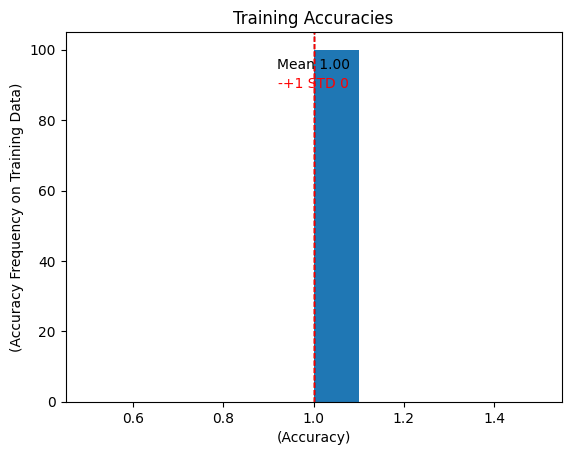

Average of training 1.0
Standard Deviation of training 0.0


In [160]:
plt.hist(training_accuracies, alpha=1)
plt.title('Training Accuracies')
plt.xlabel('(Accuracy)')
plt.ylabel('(Accuracy Frequency on Training Data)')
avg_training_accuracy = np.mean(training_accuracies)
std_training_accuracy = np.std(training_accuracies)
plt.axvline(avg_training_accuracy, color='k', linestyle='dashed', linewidth=1)
plt.axvline(avg_training_accuracy - std_training_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.axvline(avg_training_accuracy + std_training_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.text(avg_training_accuracy, plt.ylim()[1]*0.9, 'Mean {:.2f}'.format(avg_training_accuracy), horizontalalignment='center')
plt.text(avg_training_accuracy - std_training_accuracy, plt.ylim()[1]*0.85, '-+1 STD 0', horizontalalignment='center', color='red')
plt.show()
print(f'Average of training {avg_training_accuracy}')
print(f'Standard Deviation of training {std_training_accuracy}')

**Q2.2 (12 Points)** In the second histogram, you should show the accuracy distribution when
the algorithm is evaluated over testing data. The horizontal axis should show different accuracy
values, and the vertical axis should show the frequency with which that accuracy was observed
while conducting these 100 experiments/training processes. You should also report the mean
accuracy and its standard deviation.

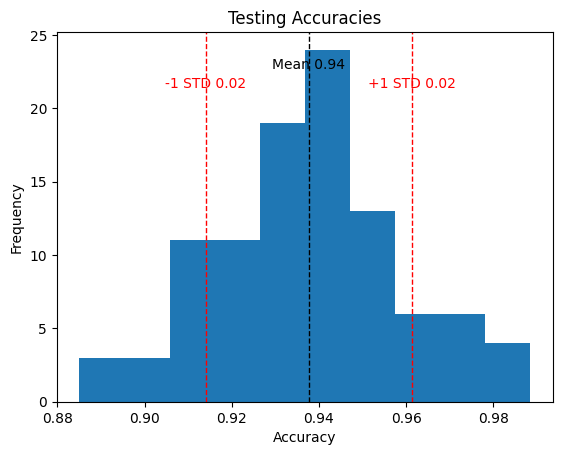

Average of testing 0.9377011494252874
Standard Deviation of testing 0.0236222976771781


In [162]:
plt.hist(testing_accuracies, alpha=1)
plt.title('Testing Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
avg_testing_accuracy = np.mean(testing_accuracies)
std_testing_accuracy = np.std(testing_accuracies)
plt.axvline(avg_testing_accuracy, color='k', linestyle='dashed', linewidth=1)
plt.axvline(avg_testing_accuracy - std_testing_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.axvline(avg_testing_accuracy + std_testing_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.text(avg_testing_accuracy, plt.ylim()[1]*0.9, 'Mean {:.2f}'.format(avg_testing_accuracy), horizontalalignment='center')
plt.text(avg_testing_accuracy - std_testing_accuracy, plt.ylim()[1]*0.85, '-1 STD {:.2f}'.format(std_testing_accuracy), horizontalalignment='center', color='red')
plt.text(avg_testing_accuracy + std_testing_accuracy, plt.ylim()[1]*0.85, '+1 STD {:.2f}'.format(std_testing_accuracy), horizontalalignment='center', color='red')
plt.show()
print(f'Average of testing {avg_testing_accuracy}')
print(f'Standard Deviation of testing {std_testing_accuracy}')

**Q2.3 (12 Points)** Explain intuitively why each of these histograms looks the way they do. Is
there more variance in one of the histograms? If so, why do you think that is the case? Does one
histogram show higher average accuracy than the other? If so, why do you think that is the case?


The histogram of the training dataset has an accuracy of 1 and a std deviation off 0 which is expected in the context of decision trees since our model was trained on this data, so for every instance it's an instance that has a path already in the tree that it will follow and make the correct prediction of the class. In other words, decision trees are capable of perfectly memorizing the training data, the model is able to capture the pattern without any error.

On the other hand, the histogram of the testing dataset has a high average accuracy around 0.93, which even though it's high is still lower than the one of the training dataset. This reduction in accuracy is due to the fact that we're actually making predictions this time, the model is encountering new unseen instances. The new instances may have different patterns which can lead to incorrect predictions. The stanfard deviation is aorund +- 0.02 which is higher than the 0 of the training but still small on the big scheme of things. This variability in the performance is normal since the model is generalizing so not all predicitons will be accurate. The model on average generalizes well to unseen data, this is shown with the high frequency in the middle around 0.93.



**Q2.4 (8 Points)** By comparing the two histograms, would you say that the Decision Trees
algorithm, when used in this dataset, is underfitting, overfitting, or performing reasonably well?
Explain your reasoning

In our case here, if we compare the two histograms we would say that the decision trees algorithm when used in this dataset is performing reasonably well, but there is some slight overfitting (not impacting the model tho). The training accuracy is 1 even when we run the code 100 times, which shows that the model is capable of perfectly memorizing the training data as mentioned earlier. We also saw that it generalizes well to new instances with an average testing accuracy of 0.93, while it might be slightly overfitting, 0.93 is still a pretty high accuracy score so I'm not sure if it's really impacting performance and the small variance proves that it's actually not, but we have to mention that there is some slight overfitting due to perfect training accuracy.

**Q2.5 (6 Points)** In class, we discussed how Decision Trees might be non-robust. Is it possible to
experimentally confirm this property/tendency via these experiments, by analyzing the histograms
you generated and their corresponding average accuracies and standard deviations? Explain your
reasoning.

In class we saw that some of the cons of decision trees is that they might be non-robust: small variations in the dataset can generate completely different trees. So, a sign of non-robustness could be a higher standard deviations in the testing dataset due to changes in the training dataset due to shuffling and splitting. After shuffling and splitting our dataset and running our code 100 times changing the training subset we still have a low standard deviation for accuracy and the accuracies are still high so it's not possible through these experiments to confirm this property by analyzing the histograms generated and their corresponding average accuracies and standard deviations. Our decison tree in our case is robust and we're going to need a different dataset to confirm non-robustness since we have relatively stable testing accuracies across different experiments, with a low standard deviation close to the variance in training accuracies.